In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
import os
import cv2

In [9]:
datapath = 'dataset'
categories = os.listdir(datapath)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))

In [25]:
img_size=100
data=[]
target=[]
for category in categories:
    folder_path = os.path.join(datapath,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img,(img_size,img_size))
            data.append(resized_img)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [26]:
data = np.array(data)/255.0
data = np.reshape(data, (len(data), 100, 100, 1))
target = np.array(target)

In [83]:
model = Sequential()
model.add(Conv2D(200, (3,3), activation='relu',input_shape = data.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

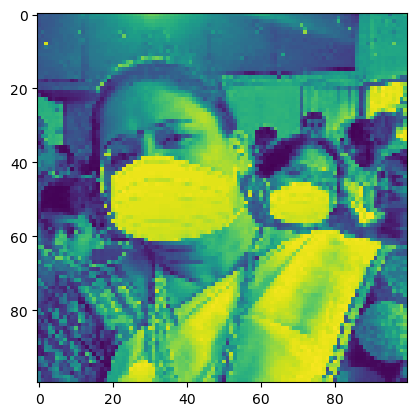

321


In [70]:
inx = random.randint(0,len(data))
plt.imshow(data[inx,:])
plt.show()
print(inx)

In [85]:
model.fit(train_data, train_target, epochs = 20)

Train on 1238 samples
Epoch 1/20
1238/1238 [==============================] - 26s 21ms/sample - loss: 0.7211 - acc: 0.5396
Epoch 2/20
1238/1238 [==============================] - 25s 20ms/sample - loss: 0.5061 - acc: 0.7480
Epoch 3/20
1238/1238 [==============================] - 25s 21ms/sample - loss: 0.3484 - acc: 0.8506
Epoch 4/20
1238/1238 [==============================] - 26s 21ms/sample - loss: 0.2057 - acc: 0.9354
Epoch 5/20
1238/1238 [==============================] - 27s 22ms/sample - loss: 0.1680 - acc: 0.9443
Epoch 6/20
1238/1238 [==============================] - 27s 22ms/sample - loss: 0.1138 - acc: 0.9645
Epoch 7/20
1238/1238 [==============================] - 27s 22ms/sample - loss: 0.0881 - acc: 0.9677
Epoch 8/20
1238/1238 [==============================] - 25s 20ms/sample - loss: 0.0626 - acc: 0.9806
Epoch 9/20
1238/1238 [==============================] - 27s 22ms/sample - loss: 0.0618 - acc: 0.9790
Epoch 10/20
1238/1238 [==============================] - 27s 22ms/sam

In [86]:
model.evaluate(test_data, test_target)

[0.18312670268874237, 0.9492754]

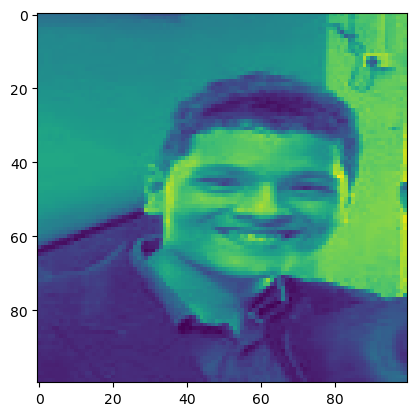

This is image has no mask


In [95]:
inx = random.randint(0,len(test_data))
plt.imshow(test_data[inx,:])
plt.show()
y_pred = model.predict(test_data[inx,:].reshape(1,100,100,1))
if y_pred[0][1]<0.5:
    print("This is image has mask")
else:
    print("This is image has no mask")